# **TeleMarketing Prediction Model Using Machine Learning Technique**

### Dataset Information and Science Direct Research Paper Link : https://archive.ics.uci.edu/dataset/222/bank+marketing

# Importing Necessary Libraries

In [33]:
# import Data Manipulation Library
import pandas as pd
import numpy as np

# import Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# import Filter Warning Library
import warnings
warnings.filterwarnings("ignore")

# import logging library
import logging

logging.basicConfig(level=logging.INFO, 
                    format = '%(asctime)s %(levelname)s:%(message)s', 
                    filename = 'model.log',
                    filemode='w')

# importing Scikit-learn library
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer

# import Deep Learning Library
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras_tuner as kt

logging.info('The Bank Telemarketing Prediction Model Started....')

In [2]:
# import Data using Pandas function

try:
    df = pd.read_csv('Bank_Telemarketing.csv', sep=';')
    logging.info("Data loaded successfully.")
except Exception as e:
    logging.error("Error loading data: ", str(e))

In [3]:
# Checking The Dataset
df.sample(frac = 1) # Shuffle the Dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
11190,55,blue-collar,married,primary,no,761,no,no,unknown,18,jun,67,1,-1,0,unknown,no
552,30,student,single,tertiary,no,34,yes,no,unknown,6,may,289,1,-1,0,unknown,no
6100,44,blue-collar,divorced,secondary,no,-222,yes,no,unknown,27,may,112,3,-1,0,unknown,no
4288,27,blue-collar,married,secondary,no,613,yes,no,unknown,19,may,65,3,-1,0,unknown,no
35834,49,services,married,unknown,no,1499,yes,no,cellular,8,may,87,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40616,49,management,divorced,tertiary,no,914,no,no,cellular,4,aug,185,1,-1,0,unknown,yes
26735,31,blue-collar,married,primary,no,389,yes,no,cellular,20,nov,198,2,-1,0,unknown,no
36822,41,blue-collar,divorced,secondary,no,139,yes,no,cellular,12,may,178,3,370,1,failure,no
21099,58,retired,married,primary,no,3,no,no,cellular,14,aug,158,2,-1,0,unknown,no


In [4]:
# Checking Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
logging.info("The Dataset contains 17 Columns out of which 7 Numerical and 10 Categorical in nature")
logging.info("No null values present in the Dataset")

In [6]:
# Seperating Numerical and Categorical Data
numerical_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

# Checking Statistical Summary

In [7]:
# Checking Descriptive Statistics
from collections import OrderedDict

def numerical_report(df):
    
    stats = []
    for i in numerical_data.columns:
        numerical_stats = OrderedDict({
            'Feature': i,
            'Mean' : df[i].mean(),
            'Median' : df[i].median(),
            'Maximum' : df[i].max(),
            'Minimum' : df[i].min(),
            '25%' : df[i].quantile(0.25),
            '75%' : df[i].quantile(0.75),
            'Variance' : df[i].var(),
            'Standard Deviation' : df[i].std(),
            'Skewness' : df[i].skew(),
            'Kurtosis' : df[i].kurtosis()
        })
        
        stats.append(numerical_stats)
    return pd.DataFrame(stats)
    
numerical_report(numerical_data)



,Feature,Mean,Median,Maximum,Minimum,25%,75%,Variance,Standard Deviation,Skewness,Kurtosis
0,age,40.936210,39.0,95,18,33.0,48.0,1.127581e+02,10.618762,0.684818,0.319570
1,balance,1362.272058,448.0,102127,-8019,72.0,1428.0,9.270599e+06,3044.765829,8.360308,140.751547
2,day,15.806419,16.0,31,1,8.0,21.0,6.926361e+01,8.322476,0.093079,-1.059897
3,duration,258.163080,180.0,4918,0,103.0,319.0,6.632057e+04,257.527812,3.144318,18.153915
4,campaign,2.763841,2.0,63,1,1.0,3.0,9.597733e+00,3.098021,4.898650,39.249651
5,pdays,40.197828,-1.0,871,-1,-1.0,-1.0,1.002577e+04,100.128746,2.615715,6.935195
6,previous,0.580323,0.0,275,0,0.0,0.0,5.305841e+00,2.303441,41.846454,4506.860660


In [ ]:
# Checking Descriptive Statistics
from collections import OrderedDict

def categorical_report(df):
    
    stats = []
    for i in categorical_data.columns:
        categorical_stats = OrderedDict({
            'Feature': i,
            'Mode': df[i].mode()
        })
        
        stats.append(categorical_stats)
    return pd.DataFrame(stats)
    
categorical_report(categorical_data)



,Feature,Mode
0,job,"0 blue-collar Name: job, dtype: object"
1,marital,"0 married Name: marital, dtype: object"
2,education,"0 secondary Name: education, dtype: object"
3,default,"0 no Name: default, dtype: object"
4,housing,"0 yes Name: housing, dtype: object"
5,loan,"0 no Name: loan, dtype: object"
6,contact,"0 cellular Name: contact, dtype: object"
7,month,"0 may Name: month, dtype: object"
8,poutcome,"0 unknown Name: poutcome, dtype: object"
9,y,"0 no Name: y, dtype: object"


In [9]:
crosstab_report = pd.crosstab(index = df['y'], columns = [df['job'], df['marital']])
crosstab_report.T

y                         no  yes
job           marital            
admin.        divorced   660   90
              married   2387  306
              single    1493  235
blue-collar   divorced   692   58
              married   6531  437
              single    1801  213
entrepreneur  divorced   164   15
              married    989   81
              single     211   27
housemaid     divorced   166   18
              married    845   67
              single     120   24
management    divorced   969  142
              married   4719  681
              single    2469  478
retired       divorced   304  121
              married   1349  382
              single      95   13
self-employed divorced   118   22
              married    914   79
              single     360   86
services      divorced   499   50
              married   2229  178
              single    1057  141
student       divorced     5    1
              married     44   10
              single     620  258
technician    divorced   848   77
              married   3636  416
              single    2273  347
unemployed    divorced   144   27
              married    634   97
              single     323   78
unknown       divorced    16    1
              married    182   21
              single      56   12

In [10]:
categorical_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

# Apply LabelEncoding to Categorical Data

In [11]:
le = LabelEncoder()

df['job'] = le.fit_transform(df['job'])

df['marital'] = le.fit_transform(df['marital'])

df['education'] = le.fit_transform(df['education'])

df['default'] = le.fit_transform(df['default'])

df['housing'] = le.fit_transform(df['housing'])

df['loan'] = le.fit_transform(df['loan'])

df['contact'] = le.fit_transform(df['contact'])

df['month'] = le.fit_transform(df['month'])

df['poutcome'] = le.fit_transform(df['poutcome'])



In [12]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [13]:
df['y'] = df['y'].replace({'yes':1, 'no':0})

In [14]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


# Split Data into Train and Test Sets

In [15]:
X = df.drop(columns='y', axis=1)
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [16]:
# Scaling 

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Apply SMOTE to balance the target classes

In [17]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

# ANN Model Building

In [19]:
# Start model building

model = Sequential()

model.add(Dense(60, activation='relu', input_dim=16))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs= 100, validation_data=(X_test, y_test))

Epoch 1/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7267 - loss: 0.5734 - val_accuracy: 0.8210 - val_loss: 0.4731
Epoch 2/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8369 - loss: 0.4129 - val_accuracy: 0.7436 - val_loss: 0.5073
Epoch 3/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8399 - loss: 0.3865 - val_accuracy: 0.7161 - val_loss: 0.5852
Epoch 4/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8486 - loss: 0.3696 - val_accuracy: 0.8274 - val_loss: 0.3649
Epoch 5/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8506 - loss: 0.3592 - val_accuracy: 0.7378 - val_loss: 0.5360
Epoch 6/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8537 - loss: 0.3514 - val_accuracy: 0.8416 - val_loss: 0.3425
Epoch 7/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8600 - loss: 0.3420 - val_accuracy: 0.8325 - val_loss: 0.3503
Epoch 8/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8530 - loss: 0

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 60)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,478 (40.93 KB)

 Trainable params: 3,492 (13.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,986 (27.29 KB)

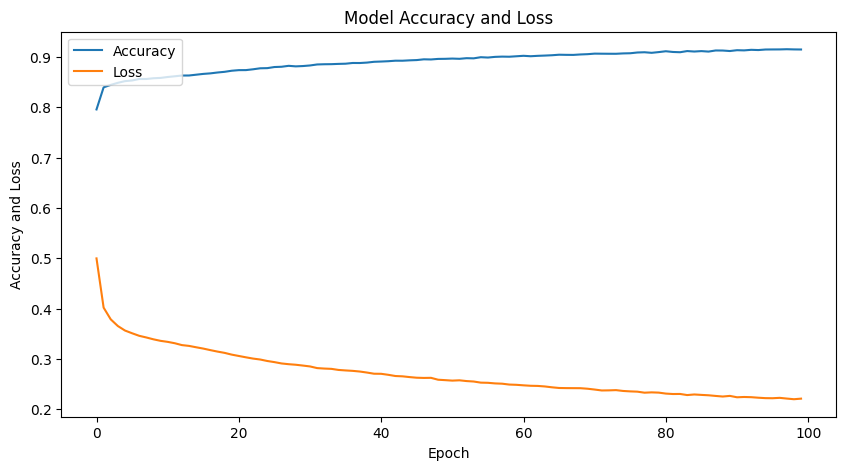

In [21]:
model_history = model.history.history

plt.figure(figsize = (10,5))
plt.plot(model_history['accuracy'])
plt.plot(model_history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'],loc = 'upper left')
plt.show()

In [22]:
y_pred_ann = model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5,1,0)
print('Accuracy Score :',accuracy_score(y_test,y_pred_ann))

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
Accuracy Score : 0.8455158686276678


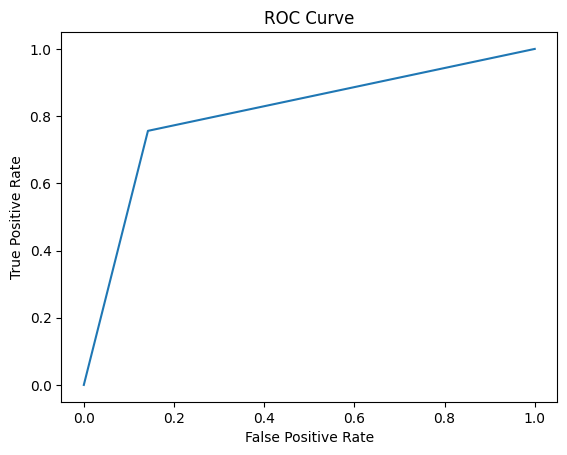

In [23]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,thresholds = roc_curve(y_test,y_pred_ann)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Hyperband tuning using Keras_tuner

In [25]:
# Function to build the model

logging.info('Keras Tuner initialized')

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    # Tune the number of layers and neurons per layer
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                                activation=hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])))

        # Tune dropout rate
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [0.01, 0.001, 0.0001])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Keras Tuner: Hyperband search
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='keras_tuner_results',
                     project_name='bank_marketing')

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Run the tuner
tuner.search(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Evaluate on test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

logging.info(f'Tuning model with best hyperparameters comppleted with best hyperparameters {best_hps.values}')


Trial 30 Complete [00h 00m 35s]
val_accuracy: 0.8324210047721863

Best val_accuracy So Far: 0.989130437374115
Total elapsed time: 00h 09m 15s
Epoch 1/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6321 - loss: 0.6427 - val_accuracy: 0.6983 - val_loss: 0.6590
Epoch 2/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6962 - loss: 0.5697 - val_accuracy: 0.7701 - val_loss: 0.5922
Epoch 3/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7412 - loss: 0.5127 - val_accuracy: 0.8801 - val_loss: 0.4681
Epoch 4/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7723 - loss: 0.4748 - val_accuracy: 0.9511 - val_loss: 0.3552
Epoch 5/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7876 - loss: 0.4514 - val_accuracy: 0.9512 - val_loss: 0.3904
Epoch 6/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7950 - loss: 0.4395 - val_accuracy: 0.9760 - val_loss: 0.3419
Epoch 7/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7991 - los

In [26]:
best_hps.values

{'num_layers': 3,
 'units_0': 32,
 'activation_0': 'sigmoid',
 'dropout_0': 0.30000000000000004,
 'learning_rate': 0.001,
 'units_1': 32,
 'activation_1': 'relu',
 'dropout_1': 0.2,
 'units_2': 128,
 'activation_2': 'tanh',
 'dropout_2': 0.1,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0012'}

In [27]:
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,861 (69.77 KB)

 Trainable params: 5,953 (23.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,908 (46.52 KB)

In [37]:
best_hps.get_config()

{'space': [{'class_name': 'Int',
   'config': {'name': 'num_layers',
    'default': None,
    'conditions': [],
    'min_value': 1,
    'max_value': 3,
    'step': 1,
    'sampling': 'linear'}},
  {'class_name': 'Int',
   'config': {'name': 'units_0',
    'default': None,
    'conditions': [],
    'min_value': 32,
    'max_value': 256,
    'step': 32,
    'sampling': 'linear'}},
  {'class_name': 'Choice',
   'config': {'name': 'activation_0',
    'default': 'relu',
    'conditions': [],
    'values': ['relu', 'tanh', 'sigmoid'],
    'ordered': False}},
  {'class_name': 'Float',
   'config': {'name': 'dropout_0',
    'default': 0.0,
    'conditions': [],
    'min_value': 0.0,
    'max_value': 0.5,
    'step': 0.1,
    'sampling': 'linear'}},
  {'class_name': 'Choice',
   'config': {'name': 'learning_rate',
    'default': 0.01,
    'conditions': [],
    'values': [0.01, 0.001, 0.0001],
    'ordered': True}},
  {'class_name': 'Int',
   'config': {'name': 'units_1',
    'default': None,
  

In [28]:
# Save the trained model as a pickle file
import pickle
with open('final_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save the scaler for future data preprocessing
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    
logging.info('Saved the final model and the preprocessor using pickle')